In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e3/sample_submission.csv
/kaggle/input/playground-series-s3e3/train.csv
/kaggle/input/playground-series-s3e3/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e3/train.csv') 
test = pd.read_csv('/kaggle/input/playground-series-s3e3/test.csv')

In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

* No NaN object
* There are 8 columns whose dtype is object -> need to change the dtype to process 


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1119 non-null   int64 
 1   Age                       1119 non-null   int64 
 2   BusinessTravel            1119 non-null   object
 3   DailyRate                 1119 non-null   int64 
 4   Department                1119 non-null   object
 5   DistanceFromHome          1119 non-null   int64 
 6   Education                 1119 non-null   int64 
 7   EducationField            1119 non-null   object
 8   EmployeeCount             1119 non-null   int64 
 9   EnvironmentSatisfaction   1119 non-null   int64 
 10  Gender                    1119 non-null   object
 11  HourlyRate                1119 non-null   int64 
 12  JobInvolvement            1119 non-null   int64 
 13  JobLevel                  1119 non-null   int64 
 14  JobRole                 

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

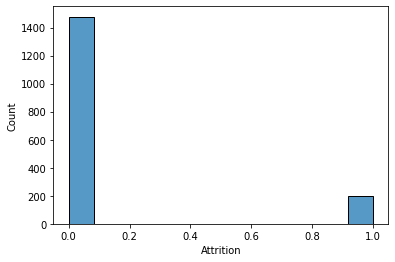

In [5]:
sns.histplot(data = train, x = 'Attrition')


**Target** 
- It is a classification dataset
- more than 80% of the dataset is 0 and only 1/7th is 1 
Hence, we will have to use different type of train - test - split or algorithm which remembers this information

*There is an imbalance in the data*

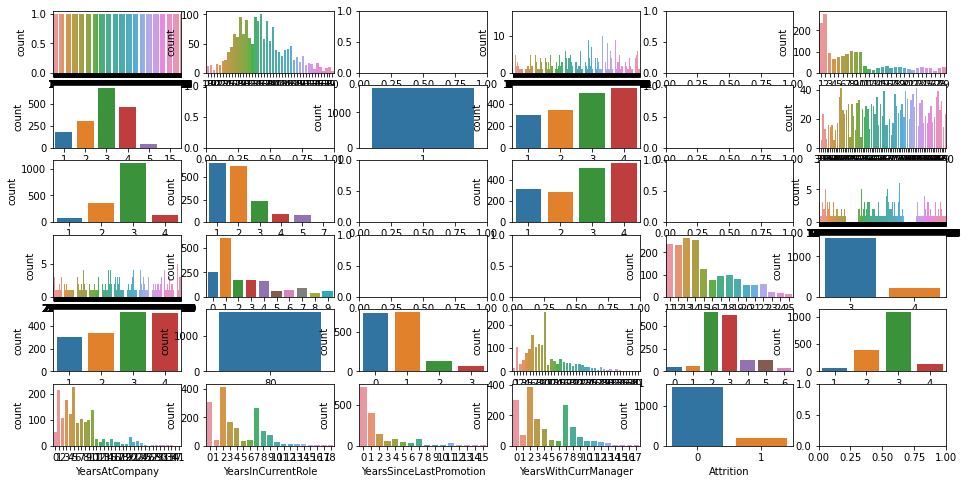

In [6]:
#plotting the one with object dtype
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(16, 8))
axs = axs.ravel()
for i, col in enumerate(train.columns):
    if train[col].dtype == 'int64':
    # Plot a histogram of the column on the i-th subplot
        sns.countplot(x  = train[col], ax = axs[i])#, hue = train['Attrition'])
   

We observe some features are just a constant number, They won' contribute to the modeling. Hence, we could remove them to make the process faster 

In [7]:
#looking at the duplicated values 
# and dropping these columns
for col in train.columns:
    unique_vals = train[col].nunique()
    if unique_vals == 1 :
        print('Column name : ', col)
        train = train.drop(col, axis = 1)
        
 

Column name :  EmployeeCount
Column name :  Over18
Column name :  StandardHours


In [8]:
for col in test.columns:
    unique_vals = test[col].nunique()
    if unique_vals == 1 :
        print('Column name : ', col)
        test= test.drop(col, axis = 1)

Column name :  EmployeeCount
Column name :  Over18
Column name :  StandardHours


<AxesSubplot:>

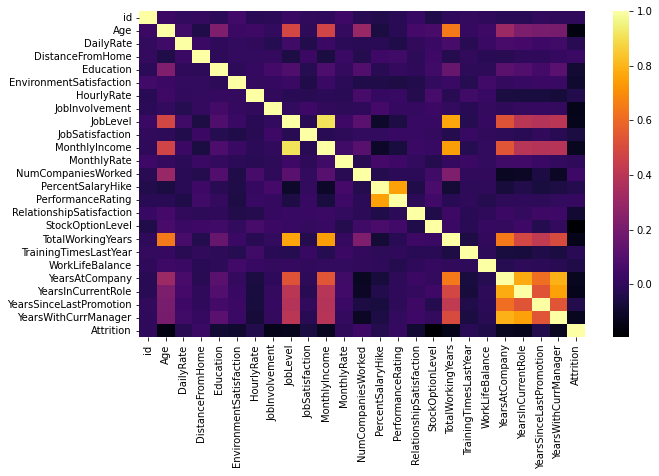

In [9]:
plt.figure(figsize =(10,6))
corr = train.corr()
sns.heatmap(corr, cmap = 'inferno')

**CORRELATION :** 

*1. The following are strongly co-related Total Working Years with age, job level, monthly income, slightly on Num of companies worke at.*

*2. Job level and monthly income and, total working years depends on years at company, thn also on years in current role, promotion*,
*with these correlated features one can create more features too*

In [10]:
#display the columns with object dtype
train_dtypeObj = train.select_dtypes('object')
test_dtypeObj = test.select_dtypes('object')

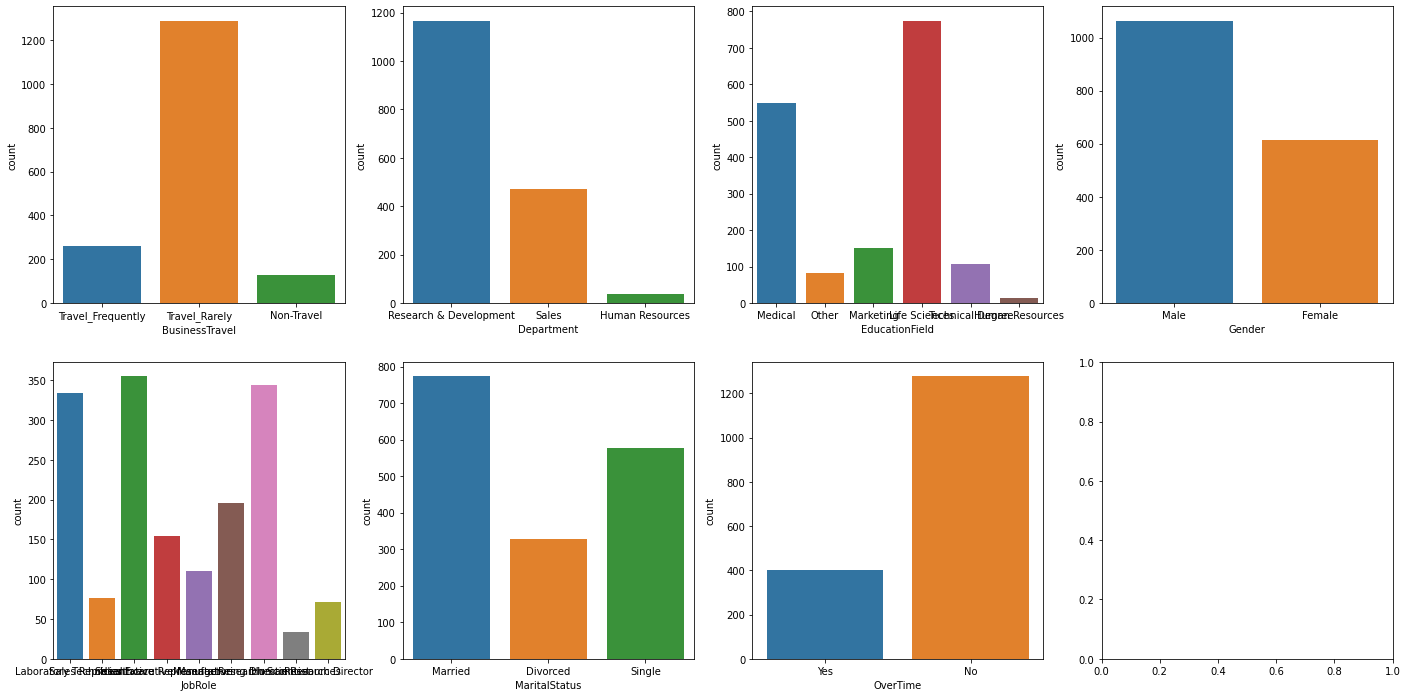

In [11]:
#plotting the one with object dtype
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))
axs = axs.ravel()
for i, col in enumerate(train_dtypeObj.columns):
    # Plot a histogram of the column on the i-th subplot
    sns.countplot(x  = train_dtypeObj[col], ax = axs[i])
   

In [12]:
#for col in train_dtypeObj.columns:
   # display(col)
   # display(train_dtypeObj[col].value_counts())

* The 'OverTime' , 'Gender', column are categorical 
* Everyone is 'Over18' -> it can be changed to only one value
* Department and, Marital status has just 3 options. 

In [13]:
from sklearn.preprocessing import OneHotEncoder 


In [14]:
OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False) # want to return numpy array and not the 

In [15]:
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_dtypeObj)) # makes zero one

#putting the index back 
OH_cols_train.index = train_dtypeObj.index
OH_cols_train.columns = OH_encoder.get_feature_names_out() #gives the column names 

In [16]:
OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(test_dtypeObj)) # makes zero one

#putting the index back 
OH_cols_test.index = test_dtypeObj.index
OH_cols_test.columns = OH_encoder.get_feature_names_out() #gives the column names 

In [17]:

#removing the object cols
train = train.select_dtypes(exclude='object')
#joining with encded one
train = pd.concat([train, OH_cols_train], axis = 1)

In [18]:
train.shape

(1677, 53)

In [19]:
#removing the object cols
test = test.select_dtypes(exclude='object')
#joining with encded one
test = pd.concat([test, OH_cols_test], axis = 1)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1677 non-null   int64  
 1   Age                                1677 non-null   int64  
 2   DailyRate                          1677 non-null   int64  
 3   DistanceFromHome                   1677 non-null   int64  
 4   Education                          1677 non-null   int64  
 5   EnvironmentSatisfaction            1677 non-null   int64  
 6   HourlyRate                         1677 non-null   int64  
 7   JobInvolvement                     1677 non-null   int64  
 8   JobLevel                           1677 non-null   int64  
 9   JobSatisfaction                    1677 non-null   int64  
 10  MonthlyIncome                      1677 non-null   int64  
 11  MonthlyRate                        1677 non-null   int64

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1119 non-null   int64  
 1   Age                                1119 non-null   int64  
 2   DailyRate                          1119 non-null   int64  
 3   DistanceFromHome                   1119 non-null   int64  
 4   Education                          1119 non-null   int64  
 5   EnvironmentSatisfaction            1119 non-null   int64  
 6   HourlyRate                         1119 non-null   int64  
 7   JobInvolvement                     1119 non-null   int64  
 8   JobLevel                           1119 non-null   int64  
 9   JobSatisfaction                    1119 non-null   int64  
 10  MonthlyIncome                      1119 non-null   int64  
 11  MonthlyRate                        1119 non-null   int64

In [22]:
X = train.drop('Attrition', axis = 1)
y = train.Attrition.values

# CLASSIFICATION

* RepeatedStratifiedKFold

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve,classification_report, confusion_matrix, auc, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score 

We observe tht there is imbalance of the target. To take care of it we "stratify". 


In [24]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y )

In [25]:
#sc = StandardScaler()
#X_train_scaled = sc.fit_transform(X_train )
#X_test_scaled = sc.transform(X_test)

In [26]:
#PCA
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 0.95) #looking for 95 % variance
#x_pca = pca.fit_transform(X_train_scaled)

In [27]:
 #pca.explained_variance_ratio_.cumsum()

In [28]:
#x = range(0, 34)
#plt.scatter(x, y = pca.explained_variance_ratio_.cumsum())
#plt.axhline(y =  0.95 , color = 'red')
#plt.xlabel('Number of components')
#plt.ylabel('Explained variance ratio')
#plt.grid()
#plt.show()

In [29]:
# number of components that explains the most variance
#n_components = 35
#pca = PCA(n_components = n_components)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

**MODELING**
1

In [30]:
#decision tree classifier
#clf = DecisionTreeClassifier(random_state = 42)
#clf.fit(X_train_pca, y_train)
#y_pred = clf.predict(X_test_pca)

#print('Accuracy : ',accuracy_score(y_test, y_pred))

In [31]:
#checking different model 
#models = [RandomForestClassifier(random_state = 42), DecisionTreeClassifier(random_state = 42),
          LGBMClassifier(random_state=42), XGBClassifier(random_state = 42)]
#model_name  = ["Random Forest", "Decision Tree", "LGBM", "XGB"]
#acc = [] #accuracy
#f1  = []# F-1 score
#roc_auc = []#AUC-
#cf = []
#for name, model in zip(model_name, models):
#    model.fit(X_train_pca, y_train)
#    y_pred = model.predict(X_test_pca)
#    accuracy = accuracy_score(y_test, y_pred)
#    f1score = f1_score(y_test, y_pred)
#    rocAuc = roc_auc_score(y_test,y_pred )
#    confusionmatrix = confusion_matrix(y_test, y_pred)
#    recall = recall_score(y_test, y_pred)
#    prec = precision_score(y_test, y_pred)
#    class_report = classification_report(y_test, y_pred)
#    cf.append(confusionmatrix)
   # print(f'---{name}---')
   # print(f'F1 - score  : {f1score}')
   # print(f'recall      : {recall}')
   # print(f'precision   : {prec}')
#    print( class_report)
#    print('Confusion marix : ', confusionmatrix)
    
    #acc.append(accuracy)
    #f1.append(f1_score)
    #roc_auc.append(rocAuc)
    
    

IndentationError: unexpected indent (71318627.py, line 3)

In [ ]:
#plotting confusion matrix
prinf cf

*Let's look at the confusion matrix*

### Precision 
precision = $\frac{#True +ves}{#True +ves + #False +ves}$
### Recall
recall = $\frac{#True +ves}{#True +ves + #False -ves}$
### F1 score

In [ ]:
#sns.histplot(y_test)

In [ ]:
print(f'There are {y_test.shape} samples')
print(f'Out of which the number of positives in test are {y_test.sum()}')


Jan 21, 
1. let's remove the train test split, use the CV model (cross-validation) 
2. 

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
cv = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True )

In [ ]:

#checking different model 
models = [RandomForestClassifier(random_state = 42), DecisionTreeClassifier(random_state = 42),
          LGBMClassifier(random_state=42), XGBClassifier(random_state = 42)]
model_name  = ["Random Forest", "Decision Tree", "LGBM", "XGB"]    
i = 1
for name, model in zip(model_name, models):
   # rocAuc=[]
    rocAucScore = []
    print(f'-----{name}------')
    for train_idx, test_idx in cv.split(X,y):
        print('\n {} of kfold {}'.format(i, cv.n_splits))
        x_train, x_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y[train_idx], y[test_idx]    
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        y_score = model.predict_proba(x_val)
        accuracy = accuracy_score(y_val, y_pred)
        #rocAuc.append(roc_auc_score(y_val,y_pred ))
        rocAucScore.append(roc_auc_score(y_val, y_score[:,1]))
        print(f'ROC_AUC  : ',np.mean(rocAucScore))
        i+=1
   # print(f'ROC_AUC Score mean : ',np.mean(rocAucScore))

We observe that we get the best score for roc-auc byb Decision Tree or XGB Classifier
Training these models better 


In [ ]:
#tuning through the model 
params = {
    'n_estimators' : [300],
    'max_depth' : np.arange(20,100,30),
    'learning_rate':[ 0.01, 0.1, 1.0]

}

In [ ]:
i = 1
for train_idx, test_idx in cv.split(X,y):
    print('\n{} of kfold {}'.format(i, cv.n_splits))
    x_train, x_val = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_val = y[train_idx], y[test_idx]    
    model = GridSearchCV(estimator = XGBClassifier(), param_grid = params, scoring = 'roc_auc', verbose = 3) #e roc-auc_score in grid only serves labels,
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    y_score = model.predict_proba(x_val)   
    print(f'ROC_AUC  : ',roc_auc_score(y_val,y_pred ))
    print(f'ROC - AUC scoring :',roc_auc_score(y_val, y_score[:,1]) ) # need to provide the probs
    i+=1

In [ ]:
best_param = {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300}
            #model.best_params_

In [ ]:
print(best_param)

In [ ]:
# XGB Regressor
i = 1
rof_auc_xgb = []
for train_idx, test_idx in cv.split(X,y):
    print('\n{} of kfold {}'.format(i, cv.n_splits))
    x_train, x_val = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_val = y[train_idx], y[test_idx]    
    xgb = XGBClassifier(**best_param)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_val)
    y_score = xgb.predict_proba(x_val)
    fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, y_score[:,1])
    rof_auc_xgb.append(roc_auc_score(y_val, y_score[:,1]))
    print(f'ROC_AUC  : ',roc_auc_score(y_val,y_pred ))
    print(f'ROC - AUC scoring :',roc_auc_score(y_val, y_score[:,1]) ) # need to provide the probs
    i+=1
print('xgb- rof-auc : ', np.mean(rof_auc_xgb))

In [ ]:
# Random Forest Classifier
paramater = {
    'max_depth': [2,8,16,32, 64],
    'n_estimators' : [128, 256, 512, 1024, 2048]
}

In [ ]:
i = 1
for train_idx, test_idx in cv.split(X,y):
    print('\n{} of kfold {}'.format(i, cv.n_splits))
    x_train, x_val = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_val = y[train_idx], y[test_idx]    
    model = GridSearchCV(estimator = RandomForestClassifier(), param_grid = paramater, scoring = 'roc_auc', verbose = 3) #e roc-auc_score in grid only serves labels,
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    y_score = model.predict_proba(x_val)   
    print(f'ROC_AUC  : ',roc_auc_score(y_val,y_pred ))
    print(f'ROC - AUC scoring :',roc_auc_score(y_val, y_score[:,1]) ) # need to provide the probs
    i+=1

In [ ]:
#rf_best_param  = model.best_params_ initially were max_dept : 32, n_est 1024
#rf_best_param  = model.best_params_
rf_best_param = {'max_depth': 32, 'n_estimators': 1024}

In [ ]:
rf_best_param #it is still the same


In [ ]:
# Random Forest Regressor
i = 1
roc_auc_rf = []
for train_idx, test_idx in cv.split(X,y):
    print('\n{} of kfold {}'.format(i, cv.n_splits))
    x_train, x_val = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_val = y[train_idx], y[test_idx]    
    rf = RandomForestClassifier(**rf_best_param)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_val)
    y_score = rf.predict_proba(x_val)
    roc_auc_rf.append(roc_auc_score(y_val, y_score[:,1]))
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_score[:,1])
    print(f'ROC_AUC  : ',roc_auc_score(y_val,y_pred ))
    print(f'ROC - AUC scoring :',roc_auc_score(y_val, y_score[:,1]) ) # need to provide the probs
    i+=1
print('RF- rof-auc : ', np.mean(roc_auc_rf))
preds = rf.predict_proba(test)

In [ ]:
feature_imp2 = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp1 = pd.Series(xgb.feature_importances_,index=X.columns).sort_values(ascending=False)



# Creating a bar plot


plt.figure(figsize=(15,20))

# Creating a bar plot
#sns.color_palette("flare", as_cmap=True)
sns.barplot(x=feature_imp2, y=feature_imp2.index, color = 'pink', label = 'Random Forest') #palette='flare'
sns.barplot(x=feature_imp1, y=feature_imp1.index, color = 'cyan', label = 'XGB Reg' )#palette = 'blend:#7AB,#EDA',

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.grid()
plt.legend()
plt.show()


In [ ]:
#plot ROC curve

plt.figure(figsize=(10,6))

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rf, tpr_rf,color = 'red', label = 'Random Forest(a=0.82')
plt.plot(fpr_xgb, tpr_xgb,color = 'cyan', label = 'XGB Classifier (a=0.81)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.title('ROC - Curve')

In [ ]:
#test_preds = []
#rf = RandomForestClassifier(**rf_best_param)
#preds = rf.predict_proba(test)
#test_preds.append(preds[:, 1])

In [ ]:
preds
test_preds = preds[:,1]

In [ ]:
submission = pd.DataFrame(data={'id': test.id, 'Attrition': test_preds})
submission.head()

In [ ]:
submission.to_csv('./submission.csv', index=False)  
